In [1]:
import os
import sys
import comtypes.client

In [2]:

#set the following flag to True to attach to an existing instance of the program
#otherwise a new instance of the program will be started
AttachToInstance = True

#set the following flag to True to manually specify the path to ETABS.exe
#this allows for a connection to a version of ETABS other than the latest installation
#otherwise the latest installed version of ETABS will be launched
SpecifyPath = False

#if the above flag is set to True, specify the path to ETABS below
ProgramPath = r"C:\Program Files\Computers and Structures\ETABS 19\ETABS.exe"

#full path to the model
#set it to the desired path of your model
APIPath = r'C:\Users\joftv\OneDrive\Documentos\MAMPRO\CSI API'
if not os.path.exists(APIPath):
    try:
        os.makedirs(APIPath)
    except OSError:
        pass
ModelPath = APIPath + os.sep + 'API_1-001.edb'

#create API helper object
helper = comtypes.client.CreateObject('ETABSv1.Helper')
helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper)

if AttachToInstance:
    #attach to a running instance of ETABS
    try:
        #get the active ETABS object
        myETABSObject = helper.GetObject("CSI.ETABS.API.ETABSObject") 
    except (OSError, comtypes.COMError):
        print("No running instance of the program found or failed to attach.")
        sys.exit(-1)
else:
    if SpecifyPath:
        try:
            #'create an instance of the ETABS object from the specified path
            myETABSObject = helper.CreateObject(ProgramPath)
        except (OSError, comtypes.COMError):
            print("Cannot start a new instance of the program from " + ProgramPath)
            sys.exit(-1)
    else:
        try: 
            #create an instance of the ETABS object from the latest installed ETABS
            myETABSObject = helper.CreateObjectProgID("CSI.ETABS.API.ETABSObject") 
        except (OSError, comtypes.COMError):
            print("Cannot start a new instance of the program.")
            sys.exit(-1)

    #start ETABS application
    myETABSObject.ApplicationStart()



In [3]:
#create SapModel object
SapModel = myETABSObject.SapModel

#establece las unidades a kgf_mm_C
SapModel.SetPresentUnits(7)

0

In [4]:
from results import JointDisplacement
caso = 'TH 01'
nodo = 51
desplazamientos = JointDisplacement(caso , nodo )

In [5]:
resultados = desplazamientos.DesplazamientoNodos()

In [6]:
print(resultados.head(200))

      Caso  Nodo  Tiempo  Ux (mm)  Uy (mm)
0    TH 01    51    0.00    0.000    0.000
1    TH 01    51    0.02   -0.019   -0.019
2    TH 01    51    0.04   -0.083   -0.084
3    TH 01    51    0.06   -0.177   -0.178
4    TH 01    51    0.08   -0.293   -0.297
..     ...   ...     ...      ...      ...
195  TH 01    51    3.90   -1.884   -6.108
196  TH 01    51    3.92   -0.176   -6.079
197  TH 01    51    3.94    1.517   -5.664
198  TH 01    51    3.96    3.117   -4.852
199  TH 01    51    3.98    4.522   -3.688

[200 rows x 5 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

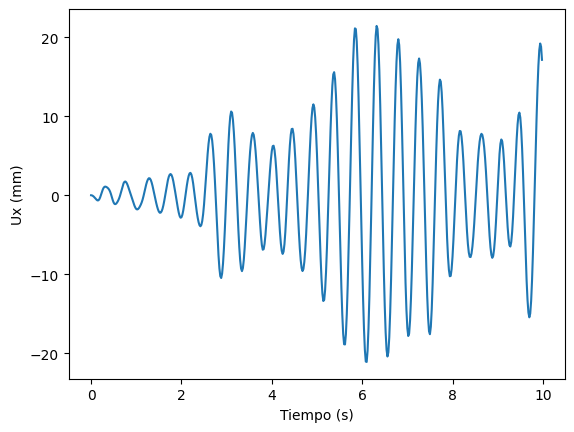

In [7]:
import matplotlib.pyplot as plt
              
plt.plot(resultados['Tiempo'].head(500), resultados['Ux (mm)'].head(500))
plt.xlabel('Tiempo (s)')
plt.ylabel('Ux (mm)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

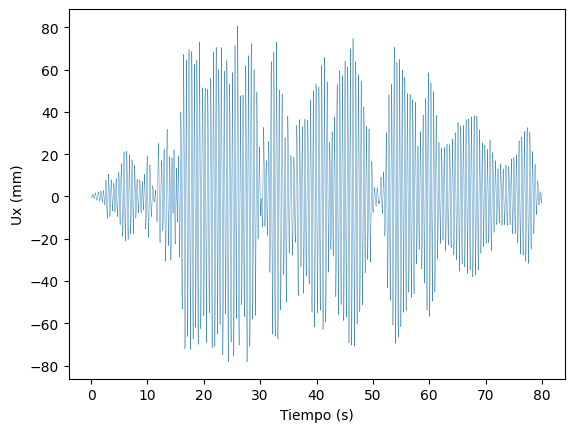

In [11]:
import matplotlib.pyplot as plt
              
plt.plot(resultados['Tiempo'], resultados['Ux (mm)'], linewidth=0.3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ux (mm)')

plt.show